# Salary Prediction
Dataset: https://www.kaggle.com/kaggle/kaggle-survey-2018

In [1]:
import numpy as np
from numpy import mean, sqrt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, auc, mean_absolute_error

df = pd.read_csv("Kaggle_Salary.csv", low_memory = False, header = 0)
pd.set_option('display.max_columns', 500)

In [2]:
df.head()

,Unnamed: 0,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,Q7_OTHER_TEXT,Q8,Q9,Q10,Q11_Part_1,Q11_Part_2,Q11_Part_3,Q11_Part_4,Q11_Part_5,Q11_Part_6,Q11_Part_7,Q11_OTHER_TEXT,Q12_MULTIPLE_CHOICE,Q12_Part_1_TEXT,Q12_Part_2_TEXT,Q12_Part_3_TEXT,Q12_Part_4_TEXT,Q12_Part_5_TEXT,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,Q13_Part_12,Q13_Part_13,Q13_Part_14,Q13_Part_15,Q13_OTHER_TEXT,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q14_OTHER_TEXT,Q15_Part_1,Q15_Part_2,Q15_Part_3,Q15_Part_4,Q15_Part_5,Q15_Part_6,Q15_Part_7,Q15_OTHER_TEXT,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_15,Q16_Part_16,Q16_Part_17,Q16_Part_18,Q16_OTHER_TEXT,Q17,Q17_OTHER_TEXT,Q18,Q18_OTHER_TEXT,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_Part_6,Q19_Part_7,Q19_Part_8,Q19_Part_9,Q19_Part_10,Q19_Part_11,Q19_Part_12,Q19_Part_13,Q19_Part_14,Q19_Part_15,Q19_Part_16,Q19_Part_17,Q19_Part_18,Q19_Part_19,Q19_OTHER_TEXT,Q20,Q20_OTHER_TEXT,Q21_Part_1,Q21_Part_2,Q21_Part_3,Q21_Part_4,Q21_Part_5,Q21_Part_6,Q21_Part_7,Q21_Part_8,Q21_Part_9,Q21_Part_10,Q21_Part_11,Q21_Part_12,Q21_Part_13,Q21_OTHER_TEXT,Q22,Q22_OTHER_TEXT,Q23,Q24,Q25,Q26,Q27_Part_1,Q27_Part_2,Q27_Part_3,Q27_Part_4,Q27_Part_5,Q27_Part_6,Q27_Part_7,Q27_Part_8,Q27_Part_9,Q27_Part_10,Q27_Part_11,Q27_Part_12,Q27_Part_13,Q27_Part_14,Q27_Part_15,Q27_Part_16,Q27_Part_17,Q27_Part_18,Q27_Part_19,Q27_Part_20,Q27_OTHER_TEXT,Q28_Part_1,Q28_Part_2,Q28_Part_3,Q28_Part_4,Q28_Part_5,Q28_Part_6,Q28_Part_7,Q28_Part_8,Q28_Part_9,Q28_Part_10,Q28_Part_11,Q28_Part_12,Q28_Part_13,Q28_Part_14,Q28_Part_15,Q28_Part_16,Q28_Part_17,Q28_Part_18,Q28_Part_19,Q28_Part_20,Q28_Part_21,Q28_Part_22,Q28_Part_23,Q28_Part_24,Q28_Part_25,Q28_Part_26,Q28_Part_27,Q28_Part_28,Q28_Part_29,Q28_Part_30,Q28_Part_31,Q28_Part_32,Q28_Part_33,Q28_Part_34,Q28_Part_35,Q28_Part_36,Q28_Part_37,Q28_Part_38,Q28_Part_39,Q28_Part_40,Q28_Part_41,Q28_Part_42,Q28_Part_43,Q28_OTHER_TEXT,Q29_Part_1,Q29_Part_2,Q29_Part_3,Q29_Part_4,Q29_Part_5,Q29_Part_6,Q29_Part_7,Q29_Part_8,Q29_Part_9,Q29_Part_10,Q29_Part_11,Q29_Part_12,Q29_Part_13,Q29_Part_14,Q29_Part_15,Q29_Part_16,Q29_Part_17,Q29_Part_18,Q29_Part_19,Q29_Part_20,Q29_Part_21,Q29_Part_22,Q29_Part_23,Q29_Part_24,Q29_Part_25,Q29_Part_26,Q29_Part_27,Q29_Part_28,Q29_OTHER_TEXT,Q30_Part_1,Q30_Part_2,Q30_Part_3,Q30_Part_4,Q30_Part_5,Q30_Part_6,Q30_Part_7,Q30_Part_8,Q30_Part_9,Q30_Part_10,Q30_Part_11,Q30_Part_12,Q30_Part_13,Q30_Part_14,Q30_Part_15,Q30_Part_16,Q30_Part_17,Q30_Part_18,Q30_Part_19,Q30_Part_20,Q30_Part_21,Q30_Part_22,Q30_Part_23,Q30_Part_24,Q30_Part_25,Q30_OTHER_TEXT,Q31_Part_1,Q31_Part_2,Q31_Part_3,Q31_Part_4,Q31_Part_5,Q31_Part_6,Q31_Part_7,Q31_Part_8,Q31_Part_9,Q31_Part_10,Q31_Part_11,Q31_Part_12,Q31_OTHER_TEXT,Q32,Q32_OTHER,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_OTHER_TEXT,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_OTHER_TEXT,Q35_Part_1,Q35_Part_2,Q35_Part_3,Q35_Part_4,Q35_Part_5,Q35_Part_6,Q35_OTHER_TEXT,Q36_Part_1,Q36_Part_2,Q36_Part_3,Q36_Part_4,Q36_Part_5,Q36_Part_6,Q36_Part_7,Q36_Part_8,Q36_Part_9,Q36_Part_10,Q36_Part_11,Q36_Part_12,Q36_Part_13,Q36_OTHER_TEXT,Q37,Q37_OTHER_TEXT,Q38_Part_1,Q38_Part_2,Q38_Part_3,Q38_Part_4,Q38_Part_5,Q38_Part_6,Q38_Part_7,Q38_Part_8,Q38_Part_9,Q38_Part_10,Q38_Part_11,Q38_Part_12,Q38_Part_13,Q38_Part_14,Q38_Part_15,Q38_Part_16,Q38_Part_17,Q38_Part_18,Q38_Part_19,Q38_Part_20,Q38_Part_21,Q38_Part_22,Q38_OTHER_TEXT,Q39_Part_1,Q39_Part_2,Q40,Q41_Part_1,Q41_Part_2,Q41_Part_3,Q42_Part_1,Q42_Part_2,Q42_Part_3,Q42_Part_4,Q42_Part_5,Q42_OTHER_TEXT,Q43,Q44_Part_1,Q44_Part_2,Q44_Part_3,Q44_Part_4,Q44_Part_5,Q44_Part_6,Q45_Part_1,Q45_P

In [3]:
df.shape

(15430, 397)

In [4]:
df.describe(include='all')

,Unnamed: 0,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,Q7_OTHER_TEXT,Q8,Q9,Q10,Q11_Part_1,Q11_Part_2,Q11_Part_3,Q11_Part_4,Q11_Part_5,Q11_Part_6,Q11_Part_7,Q11_OTHER_TEXT,Q12_MULTIPLE_CHOICE,Q12_Part_1_TEXT,Q12_Part_2_TEXT,Q12_Part_3_TEXT,Q12_Part_4_TEXT,Q12_Part_5_TEXT,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,Q13_Part_12,Q13_Part_13,Q13_Part_14,Q13_Part_15,Q13_OTHER_TEXT,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q14_OTHER_TEXT,Q15_Part_1,Q15_Part_2,Q15_Part_3,Q15_Part_4,Q15_Part_5,Q15_Part_6,Q15_Part_7,Q15_OTHER_TEXT,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_15,Q16_Part_16,Q16_Part_17,Q16_Part_18,Q16_OTHER_TEXT,Q17,Q17_OTHER_TEXT,Q18,Q18_OTHER_TEXT,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_Part_6,Q19_Part_7,Q19_Part_8,Q19_Part_9,Q19_Part_10,Q19_Part_11,Q19_Part_12,Q19_Part_13,Q19_Part_14,Q19_Part_15,Q19_Part_16,Q19_Part_17,Q19_Part_18,Q19_Part_19,Q19_OTHER_TEXT,Q20,Q20_OTHER_TEXT,Q21_Part_1,Q21_Part_2,Q21_Part_3,Q21_Part_4,Q21_Part_5,Q21_Part_6,Q21_Part_7,Q21_Part_8,Q21_Part_9,Q21_Part_10,Q21_Part_11,Q21_Part_12,Q21_Part_13,Q21_OTHER_TEXT,Q22,Q22_OTHER_TEXT,Q23,Q24,Q25,Q26,Q27_Part_1,Q27_Part_2,Q27_Part_3,Q27_Part_4,Q27_Part_5,Q27_Part_6,Q27_Part_7,Q27_Part_8,Q27_Part_9,Q27_Part_10,Q27_Part_11,Q27_Part_12,Q27_Part_13,Q27_Part_14,Q27_Part_15,Q27_Part_16,Q27_Part_17,Q27_Part_18,Q27_Part_19,Q27_Part_20,Q27_OTHER_TEXT,Q28_Part_1,Q28_Part_2,Q28_Part_3,Q28_Part_4,Q28_Part_5,Q28_Part_6,Q28_Part_7,Q28_Part_8,Q28_Part_9,Q28_Part_10,Q28_Part_11,Q28_Part_12,Q28_Part_13,Q28_Part_14,Q28_Part_15,Q28_Part_16,Q28_Part_17,Q28_Part_18,Q28_Part_19,Q28_Part_20,Q28_Part_21,Q28_Part_22,Q28_Part_23,Q28_Part_24,Q28_Part_25,Q28_Part_26,Q28_Part_27,Q28_Part_28,Q28_Part_29,Q28_Part_30,Q28_Part_31,Q28_Part_32,Q28_Part_33,Q28_Part_34,Q28_Part_35,Q28_Part_36,Q28_Part_37,Q28_Part_38,Q28_Part_39,Q28_Part_40,Q28_Part_41,Q28_Part_42,Q28_Part_43,Q28_OTHER_TEXT,Q29_Part_1,Q29_Part_2,Q29_Part_3,Q29_Part_4,Q29_Part_5,Q29_Part_6,Q29_Part_7,Q29_Part_8,Q29_Part_9,Q29_Part_10,Q29_Part_11,Q29_Part_12,Q29_Part_13,Q29_Part_14,Q29_Part_15,Q29_Part_16,Q29_Part_17,Q29_Part_18,Q29_Part_19,Q29_Part_20,Q29_Part_21,Q29_Part_22,Q29_Part_23,Q29_Part_24,Q29_Part_25,Q29_Part_26,Q29_Part_27,Q29_Part_28,Q29_OTHER_TEXT,Q30_Part_1,Q30_Part_2,Q30_Part_3,Q30_Part_4,Q30_Part_5,Q30_Part_6,Q30_Part_7,Q30_Part_8,Q30_Part_9,Q30_Part_10,Q30_Part_11,Q30_Part_12,Q30_Part_13,Q30_Part_14,Q30_Part_15,Q30_Part_16,Q30_Part_17,Q30_Part_18,Q30_Part_19,Q30_Part_20,Q30_Part_21,Q30_Part_22,Q30_Part_23,Q30_Part_24,Q30_Part_25,Q30_OTHER_TEXT,Q31_Part_1,Q31_Part_2,Q31_Part_3,Q31_Part_4,Q31_Part_5,Q31_Part_6,Q31_Part_7,Q31_Part_8,Q31_Part_9,Q31_Part_10,Q31_Part_11,Q31_Part_12,Q31_OTHER_TEXT,Q32,Q32_OTHER,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_OTHER_TEXT,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_OTHER_TEXT,Q35_Part_1,Q35_Part_2,Q35_Part_3,Q35_Part_4,Q35_Part_5,Q35_Part_6,Q35_OTHER_TEXT,Q36_Part_1,Q36_Part_2,Q36_Part_3,Q36_Part_4,Q36_Part_5,Q36_Part_6,Q36_Part_7,Q36_Part_8,Q36_Part_9,Q36_Part_10,Q36_Part_11,Q36_Part_12,Q36_Part_13,Q36_OTHER_TEXT,Q37,Q37_OTHER_TEXT,Q38_Part_1,Q38_Part_2,Q38_Part_3,Q38_Part_4,Q38_Part_5,Q38_Part_6,Q38_Part_7,Q38_Part_8,Q38_Part_9,Q38_Part_10,Q38_Part_11,Q38_Part_12,Q38_Part_13,Q38_Part_14,Q38_Part_15,Q38_Part_16,Q38_Part_17,Q38_Part_18,Q38_Part_19,Q38_Part_20,Q38_Part_21,Q38_Part_22,Q38_OTHER_TEXT,Q39_Part_1,Q39_Part_2,Q40,Q41_Part_1,Q41_Part_2,Q41_Part_3,Q42_Part_1,Q42_Part_2,Q42_Part_3,Q42_Part_4,Q42_Part_5,Q42_OTHER_TEXT,Q43,Q44_Part_1,Q44_Part_2,Q44_Part_3,Q44_Part_4,Q44_Part_5,Q44_Part_6,Q45_Part_1,Q45_P

#### This assignment will focus on the top five countries that have the most participants completing the survey. They also represent countries with leading technologies in the field of data science. 

In [5]:
df = df[(df['Q3']=='United States of America')|(df['Q3']=='India')|(df['Q3']=='China')|(df['Q3']=='Russia')|(df['Q3']=='Brazil')|(df['Q3']=='Germany')|(df['Q3']=='United Kingdom of Great Britain and Northern Ireland')|(df['Q3']=='Canada')]

df.shape  

(9163, 397)

In [6]:
df['Q39_Part_1'].mode()

0    Slightly better
dtype: object

## Step 1 - Data Preparation 
- **Columns filled with text**: 'Q1_OTHER_TEXT', 'Q6_OTHER_TEXT', 'Q7_OTHER_TEXT', 'Q11_OTHER_TEXT', 'Q13_OTHER_TEXT', 'Q14_OTHER_TEXT!', 'Q15_OTHER_TEXT', 'Q16_OTHER_TEXT', 'Q17_OTHER_TEXT', 'Q18_OTHER_TEXT', 'Q19_OTHER_TEXT', 'Q20_OTHER_TEXT', 'Q21_OTHER_TEXT', 'Q22_OTHER_TEXT', 'Q27_OTHER_TEXT', Q28_OTHER_TEXT', Q29_OTHER_TEXT', 'Q30_OTHER_TEXT', 'Q31_OTHER_TEXT', 'Q32_OTHER', 'Q33_OTHER_TEXT', 'Q34_OTHER_TEXT', 'Q35_OTHER_TEXT', 'Q36_OTHER_TEXT', 'Q37_OTHER_TEXT', 'Q38_OTHER_TEXT','Q42_OTHER_TEXT', 'Q47_Part_16', 'Q49_OTHER_TEXT', 'Q50_OTHER_TEXT'

These columns were provided as the option of "Other" for their correponding survey questions, which allowed survey takers to write down their answers in text format outside of the given choices. Since the sample size of these type of questions are relatively small and not representative of the majority of the respondents, the columns will not be taken into consideration for this project and will be dropped. 

The rest of the columns can be separated into four groups shown as follows. Depending on the group the columns belong to, the cleaning and encoding method will vary.
- **Survey questions "Select only one that apply" with one column of answers, nominal data**: 'Q1', 'Q3', 'Q5', 'Q6', 'Q7', 'Q12_MULTIPLE_CHOICE', 'Q17', 'Q18', 'Q20', 'Q22', 'Q32', 'Q37', 'Q40', among which 'Q17', 'Q20', 'Q22', 'Q32', 'Q37', 'Q40' will be dropped because there are a huge amount of missing value. Any replacement would be inadequate for the actual response. The missing values of 'Q5' are filled with mode because "Q5" has very few missing values. Filling it with a value will not have a huge impact on the model. Missing values of 'Q12_MULTIPLE_CHOICE' and 'Q18' will be dropped. This column set is encoded through one hot encoding method because these columns have multiple values. One hot encoder creates a column for every category in categorical data. 
- **Survey questions "Select all that apply" with a multiple-choice list**: Q11, Q13, Q14, Q15, Q16, Q19, Q21, Q27, Q28, Q29, Q30, Q31, Q33, Q36, Q38, Q42, Q44, Q45, Q47, Q49, Q50, Columns will null values will be dropped since respondent did not select a choice. This column set is encoded through label encoding method where a unique numerical value is assigned to each of the two values.  
- **Survey questions "Select only one that apply" with multiple columns of answers**: 
1. 'Q12_Part_1_TEXT', 'Q12_Part_2_TEXT', 'Q12_Part_3_TEXT', 'Q12_Part_4_TEXT', 'Q12_Part_5_TEXT', 'Q12_OTHER_TEXT',
This set is the essentially the same as 'Q12_MULTIPLE_CHOICE'; thus will be removed. 
- **Survey questions concerning ordinal data**: 'Q2', 'Q4', 'Q8', 'Q9', 'Q10','Q23', 'Q24', 'Q25', 'Q26','Q39_Part_1', 'Q39_Part_2', 'Q41_Part_1', 'Q41_Part_2', 'Q41_Part_3', 'Q43', 'Q46', 'Q48', among which 'Q25', 'Q26', 'Q39_Part_1', 'Q39_Part_2', 'Q41_Part_1', 'Q41_Part_2', 'Q41_Part_3', 'Q43', 'Q46', 'Q48' will be dropped because there are a huge amount of missing value. Any replacement would be inadequate for the actual response. Missing values of 'Q23', 'Q24', 'Q10', 'Q8' will be dropped. This column set is encoded through label encoding method where a unique numerical value is assigned to each category following the order of the data.
- Q34, Q35 involve time as interval data. They will not be included in the model due to complexity. 


In [7]:

def drop_columns(df):
    list_of_column_drop = ['Q1_OTHER_TEXT', 'Q6_OTHER_TEXT', 'Q7_OTHER_TEXT',
                       'Q11_OTHER_TEXT', 'Q13_OTHER_TEXT', 'Q14_OTHER_TEXT', 
                       'Q15_OTHER_TEXT', 'Q16_OTHER_TEXT', 'Q17_OTHER_TEXT', 
                       'Q18_OTHER_TEXT', 'Q19_OTHER_TEXT', 'Q47_Part_16', 
                       'Q20_OTHER_TEXT', 'Q21_OTHER_TEXT', 'Q22_OTHER_TEXT', 
                       'Q27_OTHER_TEXT', 'Q28_OTHER_TEXT', 'Q29_OTHER_TEXT', 
                       'Q30_OTHER_TEXT', 'Q34_OTHER_TEXT', 'Q32_OTHER', 
                       'Q31_OTHER_TEXT', 'Q33_OTHER_TEXT', 'Q35_OTHER_TEXT', 
                       'Q36_OTHER_TEXT', 'Q37_OTHER_TEXT', 'Q38_OTHER_TEXT',
                       'Q42_OTHER_TEXT', 'Q49_OTHER_TEXT', 'Q50_OTHER_TEXT',
                       'Q17', 'Q20', 'Q22', 'Q25', 'Q26', 'Q32', 'Q37', 'Q40',
                       'Q39_Part_1', 'Q39_Part_2', 'Q41_Part_1', 'Q41_Part_2', 
                       'Q41_Part_3','Q43', 'Q46', 'Q48', 'Q12_Part_1_TEXT', 
                       'Q12_Part_2_TEXT','Q12_Part_3_TEXT', 'Q12_Part_4_TEXT', 
                       'Q12_Part_5_TEXT', 'Q12_OTHER_TEXT', 'Q34_Part_1', 
                       'Q34_Part_2', 'Q34_Part_3','Q34_Part_4', 'Q34_Part_5', 
                       'Q34_Part_6', 'Q35_Part_1', 'Q35_Part_2', 'Q35_Part_3', 
                       'Q35_Part_4', 'Q35_Part_5', 'Q35_Part_6']
    
    df = df.drop('Time from Start to Finish (seconds)', axis=1)
    df = df.drop('Unnamed: 0', axis=1)
    #df = df.drop([0], axis=0) #drop the first row
    df = df.drop(list_of_column_drop, axis=1)
    return df

# #encode column set 3 to binary values
# def encode_column_set_3(df):
#     L3 = ['Q12_Part_1_TEXT', 'Q12_Part_2_TEXT', 'Q12_Part_3_TEXT',
#       'Q12_Part_4_TEXT', 'Q12_Part_5_TEXT', 'Q12_OTHER_TEXT']
#     for index, row in df.iterrows():
#         for column in L3:
#             if df.loc[index, column] == -1:
#                 df.at[index, column] = 0
#             else: 
#                 df.at[index, column] = 1
#     return df 


def clean_column_set_2(df):
    L2 = ['Q11', 'Q13', 'Q14', 'Q15', 'Q16', 'Q19', 'Q21', 'Q27',
          'Q28', 'Q29', 'Q30', 'Q31', 'Q33', 'Q36', 'Q38', 'Q42', 
          'Q44', 'Q45', 'Q47', 'Q49', 'Q50']
    #create a list of columns of all the choices for all the questions in L2
    list_of_columns_set_2 = []
    for ques in L2:
        list_of_columns_set_2_for_one_question = [] #create a list of columns of all the choices for each question
        for column in list_of_columns:
            if ques in column:
                list_of_columns_set_2_for_one_question.append(column)
                list_of_columns_set_2.append(column)
        
        #drop rows without response 
        for index, row in df.iterrows():
            null_value = 0
            for column in list_of_columns_set_2_for_one_question:
                if df.loc[index, column] == np.nan:
                    null_value = null_value + 1
            if null_value == len(list_of_columns_set_2_for_one_question):
                df = df.drop([index], axis=0) 
    
    #Fill null values with 0, encode not null values to 1
    for column in list_of_columns_set_2: 
        df.loc[df[column].notnull(), column] = 1
        df.loc[df[column].isnull(), column] = 0
    
#     #encode with label encoder
#     for column in list_of_columns_set_2:
#         labelencoder = LabelEncoder()
#         df[column] = labelencoder.fit_transform(df[column])
    return df


def fill_in_missing_value(df):
    df['Q5'].fillna(df['Q5'].mode()[0], inplace=True)
    df.dropna(subset=['Q12_MULTIPLE_CHOICE'], inplace = True)
    df.dropna(subset=['Q18'], inplace = True)
    df.dropna(subset=['Q23'], inplace = True)
    df.dropna(subset=['Q24'], inplace = True)
    df= df[df['Q4'] != 'I prefer not to answer']
    df= df[df['Q1'] != 'Prefer not to say']
    df= df[df['Q1'] != 'Prefer to self-describe']
    df.dropna(subset=['Q8'], inplace = True)
    df.dropna(subset=['Q10'], inplace = True)
    df= df[df['Q10'] != 'I do not know']
    return df 


def encode_column_set_1(df):
    L1 =  ['Q1', 'Q3', 'Q5', 'Q6', 'Q7', 'Q12_MULTIPLE_CHOICE', 'Q18']
    for column in L1:
        one_hot = pd.get_dummies(df[column])
        df = df.drop(column,axis = 1)
        df = df.join(one_hot, lsuffix='_caller', rsuffix='_other')
    
    return df


def clean_column_set_4(df): 
    L4 =  ['Q2', 'Q4', 'Q8', 'Q9', 'Q23', 'Q24']
    scale_Q2 = {'30-34': 3, '22-24': 1, '35-39': 4, '18-21': 0, '40-44': 5, '25-29': 2, '55-59': 8, 
                '60-69': 9, '45-49': 6, '50-54': 7, '80+': 11, '70-79': 10}
    scale_Q4 = {'Bachelor’s degree': 3, 'Master’s degree': 4, 'Doctoral degree': 5,'Professional degree': 1,
                'Some college/university study without earning a bachelor’s degree': 2, 
                'No formal education past high school': 0}
    scale_Q8 = {'5-10': 5, '0-1': 0, '10-15': 6, '3-4': 3, '1-2': 1, '2-3': 2, '15-20': 7, '4-5': 4,
                '25-30': 9, '20-25': 8, '30 +': 10}
    scale_Q9 = {'10-20,000': 1, '0-10,000': 0, '20-30,000': 2, '125-150,000': 11, '30-40,000': 3, 
                '50-60,000': 5, '100-125,000': 10, '90-100,000': 9, '70-80,000': 7, '80-90,000': 8, 
                '60-70,000': 6, '400-500,000': 16, '40-50,000': 4, '150-200,000': 12, '500,000+': 17,
                '300-400,000': 15, '200-250,000': 13, '250-300,000': 14}
    scale_Q10 = {'No (we do not use ML methods)': 0, 
                 'We recently started using ML methods (i.e., models in production for less than 2 years)': 3,
                 'We have well established ML methods (i.e., models in production for more than 2 years)': 4,
                 'We are exploring ML methods (and may one day put a model into production)': 1,
                 'We use ML methods for generating insights (but do not put working models into production)': 2}
    scale_Q23 = {'1% to 25% of my time': 1, '75% to 99% of my time': 4,
                 '25% to 49% of my time': 2, '50% to 74% of my time': 3,
                 '100% of my time': 5, '0% of my time': 0}
    scale_Q24 = {'I have never written code but I want to learn': 1, '5-10 years': 5,
                 '< 1 year': 2, '1-2 years': 3, '3-5 years': 4, '10-20 years': 6, '30-40 years': 8,
                 '20-30 years': 7,'I have never written code and I do not want to learn': 0,
                 '40+ years': 9}
    df['Q2'] = df['Q2'].replace(scale_Q2)
    df['Q4'] = df['Q4'].replace(scale_Q4)
    df['Q8'] = df['Q8'].replace(scale_Q8)
    df['Q9'] = df['Q9'].replace(scale_Q9)
    df['Q10'] = df['Q10'].replace(scale_Q10)
    df['Q23'] = df['Q23'].replace(scale_Q23)
    df['Q24'] = df['Q24'].replace(scale_Q24)
    return df
    
    
df = drop_columns(df)
#df = encode_column_set_3(df)
list_of_columns = list(df.columns.values) #List of all columns
df = clean_column_set_2(df)
df = fill_in_missing_value(df)
df = encode_column_set_1(df)
Salaries = clean_column_set_4(df)

In [8]:
Salaries

,Q2,Q4,Q8,Q9,Q10,Q11_Part_1,Q11_Part_2,Q11_Part_3,Q11_Part_4,Q11_Part_5,Q11_Part_6,Q11_Part_7,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,Q13_Part_12,Q13_Part_13,Q13_Part_14,Q13_Part_15,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q15_Part_1,Q15_Part_2,Q15_Part_3,Q15_Part_4,Q15_Part_5,Q15_Part_6,Q15_Part_7,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_15,Q16_Part_16,Q16_Part_17,Q16_Part_18,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_Part_6,Q19_Part_7,Q19_Part_8,Q19_Part_9,Q19_Part_10,Q19_Part_11,Q19_Part_12,Q19_Part_13,Q19_Part_14,Q19_Part_15,Q19_Part_16,Q19_Part_17,Q19_Part_18,Q19_Part_19,Q21_Part_1,Q21_Part_2,Q21_Part_3,Q21_Part_4,Q21_Part_5,Q21_Part_6,Q21_Part_7,Q21_Part_8,Q21_Part_9,Q21_Part_10,Q21_Part_11,Q21_Part_12,Q21_Part_13,Q23,Q24,Q27_Part_1,Q27_Part_2,Q27_Part_3,Q27_Part_4,Q27_Part_5,Q27_Part_6,Q27_Part_7,Q27_Part_8,Q27_Part_9,Q27_Part_10,Q27_Part_11,Q27_Part_12,Q27_Part_13,Q27_Part_14,Q27_Part_15,Q27_Part_16,Q27_Part_17,Q27_Part_18,Q27_Part_19,Q27_Part_20,Q28_Part_1,Q28_Part_2,Q28_Part_3,Q28_Part_4,Q28_Part_5,Q28_Part_6,Q28_Part_7,Q28_Part_8,Q28_Part_9,Q28_Part_10,Q28_Part_11,Q28_Part_12,Q28_Part_13,Q28_Part_14,Q28_Part_15,Q28_Part_16,Q28_Part_17,Q28_Part_18,Q28_Part_19,Q28_Part_20,Q28_Part_21,Q28_Part_22,Q28_Part_23,Q28_Part_24,Q28_Part_25,Q28_Part_26,Q28_Part_27,Q28_Part_28,Q28_Part_29,Q28_Part_30,Q28_Part_31,Q28_Part_32,Q28_Part_33,Q28_Part_34,Q28_Part_35,Q28_Part_36,Q28_Part_37,Q28_Part_38,Q28_Part_39,Q28_Part_40,Q28_Part_41,Q28_Part_42,Q28_Part_43,Q29_Part_1,Q29_Part_2,Q29_Part_3,Q29_Part_4,Q29_Part_5,Q29_Part_6,Q29_Part_7,Q29_Part_8,Q29_Part_9,Q29_Part_10,Q29_Part_11,Q29_Part_12,Q29_Part_13,Q29_Part_14,Q29_Part_15,Q29_Part_16,Q29_Part_17,Q29_Part_18,Q29_Part_19,Q29_Part_20,Q29_Part_21,Q29_Part_22,Q29_Part_23,Q29_Part_24,Q29_Part_25,Q29_Part_26,Q29_Part_27,Q29_Part_28,Q30_Part_1,Q30_Part_2,Q30_Part_3,Q30_Part_4,Q30_Part_5,Q30_Part_6,Q30_Part_7,Q30_Part_8,Q30_Part_9,Q30_Part_10,Q30_Part_11,Q30_Part_12,Q30_Part_13,Q30_Part_14,Q30_Part_15,Q30_Part_16,Q30_Part_17,Q30_Part_18,Q30_Part_19,Q30_Part_20,Q30_Part_21,Q30_Part_22,Q30_Part_23,Q30_Part_24,Q30_Part_25,Q31_Part_1,Q31_Part_2,Q31_Part_3,Q31_Part_4,Q31_Part_5,Q31_Part_6,Q31_Part_7,Q31_Part_8,Q31_Part_9,Q31_Part_10,Q31_Part_11,Q31_Part_12,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q36_Part_1,Q36_Part_2,Q36_Part_3,Q36_Part_4,Q36_Part_5,Q36_Part_6,Q36_Part_7,Q36_Part_8,Q36_Part_9,Q36_Part_10,Q36_Part_11,Q36_Part_12,Q36_Part_13,Q38_Part_1,Q38_Part_2,Q38_Part_3,Q38_Part_4,Q38_Part_5,Q38_Part_6,Q38_Part_7,Q38_Part_8,Q38_Part_9,Q38_Part_10,Q38_Part_11,Q38_Part_12,Q38_Part_13,Q38_Part_14,Q38_Part_15,Q38_Part_16,Q38_Part_17,Q38_Part_18,Q38_Part_19,Q38_Part_20,Q38_Part_21,Q38_Part_22,Q42_Part_1,Q42_Part_2,Q42_Part_3,Q42_Part_4,Q42_Part_5,Q44_Part_1,Q44_Part_2,Q44_Part_3,Q44_Part_4,Q44_Part_5,Q44_Part_6,Q45_Part_1,Q45_Part_2,Q45_Part_3,Q45_Part_4,Q45_Part_5,Q45_Part_6,Q47_Part_1,Q47_Part_2,Q47_Part_3,Q47_Part_4,Q47_Part_5,Q47_Part_6,Q47_Part_7,Q47_Part_8,Q47_Part_9,Q47_Part_10,Q47_Part_11,Q47_Part_12,Q47_Part_13,Q47_Part_14,Q47_Part_15,Q49_Part_1,Q49_Part_2,Q49_Part_3,Q49_Part_4,Q49_Part_5,Q49_Part_6,Q49_Part_7,Q49_Part_8,Q49_Part_9,Q49_Part_10,Q49_Part_11,Q49_Part_12,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,index,Female,Male,Brazil,Canada,China,Germany,India,Russia,United Kingdom of Great Britain and Northern Ireland,United States of America,"A business discipline (accounting, economics, finance, etc.)","Computer science (software engineering, etc.)",Engineering (non-computer focused),Environmental science or geology,Fine arts or performing arts,"Humanities 

In [9]:
Salaries.shape

(7106, 405)

## Step 2 - Exploratory data analysis 
### Three Figures

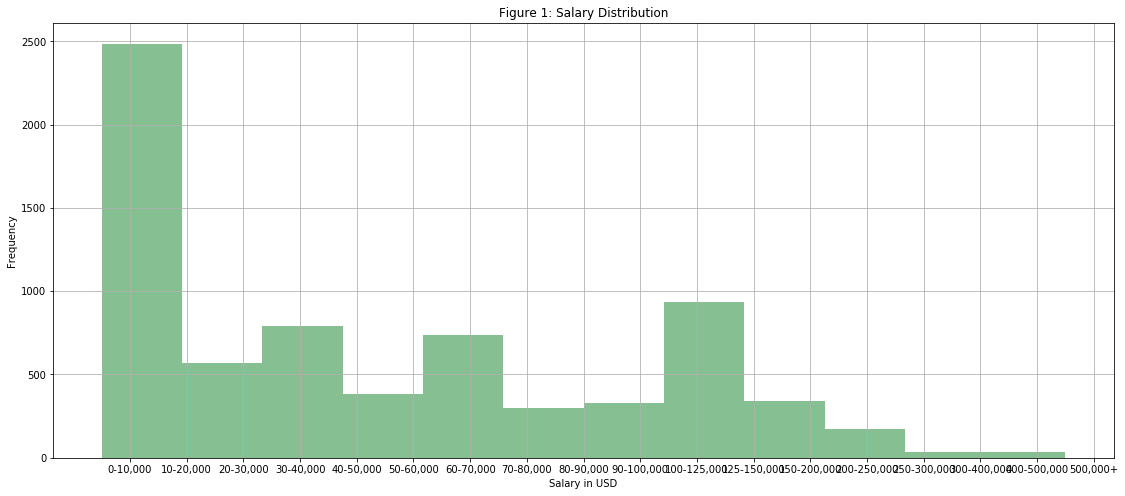

In [10]:
Salaries_plot = Salaries.copy()
Salaries_list = ['0-10,000', '10-20,000','20-30,000', '30-40,000', '40-50,000', '50-60,000', 
                '60-70,000', '70-80,000', '80-90,000', '90-100,000', '100-125,000',
                '125-150,000', '150-200,000', '200-250,000', '250-300,000', '300-400,000',
                '400-500,000','500,000+' ]
dis = Salaries_plot.hist('Q9', bins=12, figsize=(19,8), color='#86bf91')
dis = dis.flatten()[0] 
dis.set_title("Figure 1: Salary Distribution")
dis.set_xlabel('Salary in USD')
dis.set_ylabel('Frequency')
ind = np.arange(len(Salaries_list))
width = 1
dis.set_xticks(ind + width / 2)
dis.set_xticklabels(Salaries_list)
plt.show()


- Figure 1 shows the salary distribution. This figure indicates that a large proportion of participants have less than 10,000 USD yearly compensation, which may be due to the fact that a lot of participants do not have a full time job yet, for example, students account for 14.0% of the participants. The second mode appears at 100,000 to 125,000 with less than 1000 participants. There are very few people who can earn more than 250,000 per year.

In [11]:
Female = Salaries_plot[Salaries_plot['Female'] == 1]
Male = Salaries_plot[Salaries_plot['Male'] == 1]

a = Female['Q9'].value_counts().sort_index()
b = Male['Q9'].value_counts().sort_index()
c = pd.concat([a,b], axis=1).fillna(0)
c.columns = ['woman','man']
c.transpose()
c

,woman,man
0,243.0,1418
1,107.0,718
2,81.0,486
3,66.0,367
4,64.0,295
5,80.0,300
6,77.0,290
7,64.0,305
8,71.0,227
9,60.0,269


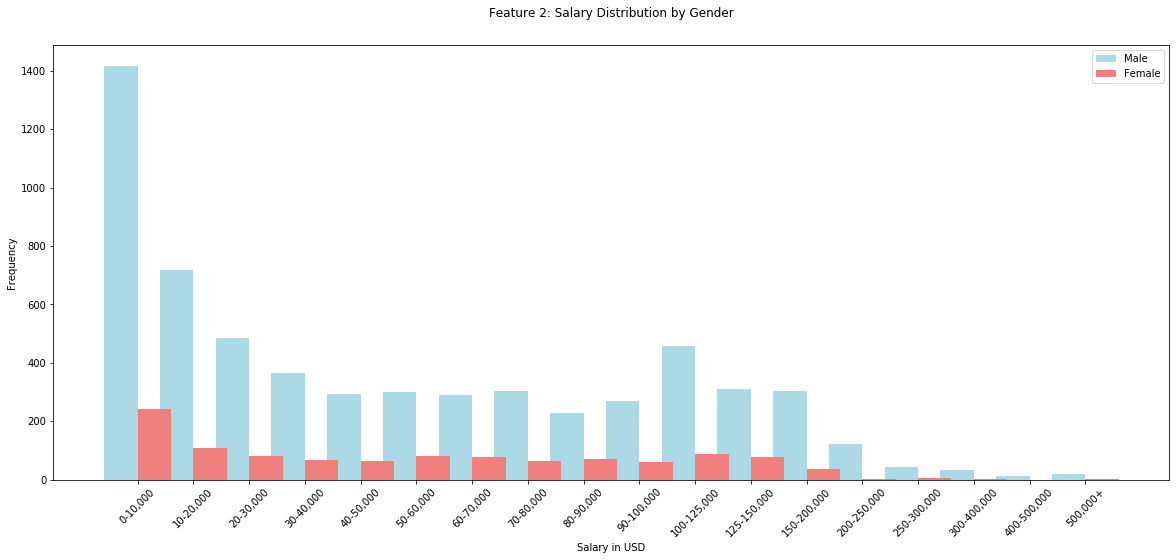

In [12]:
fig, ax = plt.subplots(figsize=(20,8))
ind = np.arange(len(Salaries_list))
width = 0.60

female = c['woman'].tolist()
male = c['man'].tolist()

p1 = ax.bar(ind,male,width,color='lightblue')
p2 = ax.bar(ind+width,female,width,color='lightcoral')

ax.set_title('Feature 2: Salary Distribution by Gender',y=1.05)
ax.set_ylabel('Frequency')
ax.set_xlabel('Salary in USD')
ax.set_xticks(ind + width / 2)    
ax.set_xticklabels(Salaries_list)

ax.legend((p1[0], p2[0]), ('Male', 'Female'))

plt.xticks(rotation=45)
plt.show()

- Figure 2 shows the salary distribution by gender. The proportion of female participants is significantly less than that of female participants; however, the trends for both female and male participants generally correspond to the trend for all participants. 

In [13]:
def create_list_of_series(Salaries_plot):
    list_of_series = []
    for i in range(6):
        arry = Salaries_plot[Salaries_plot['Q4'] == i]
        series = arry['Q9'].value_counts().sort_index()
        list_of_series.append(series)
    return list_of_series

list_of_series = create_list_of_series(Salaries_plot)
d = pd.concat(list_of_series, axis=1).fillna(0)
d.columns = ['No formal education past high school', 'Professional degree',
             'Some college/university study without earning a bachelor’s degree',
             'Bachelor’s degree', 'Master’s degree', 'Doctoral degree']
d

,No formal education past high school,Professional degree,Some college/university study without earning a bachelor’s degree,Bachelor’s degree,Master’s degree,Doctoral degree
0,6.0,43.0,86.0,705,676,145
1,4.0,38.0,19.0,284,383,97
2,3.0,27.0,27.0,163,236,111
3,5.0,13.0,12.0,120,190,93
4,0.0,10.0,10.0,102,174,63
5,5.0,8.0,9.0,92,187,79
6,1.0,6.0,11.0,98,170,81
7,2.0,4.0,14.0,94,189,66
8,0.0,3.0,7.0,75,162,51
9,0.0,5.0,6.0,66,184,68


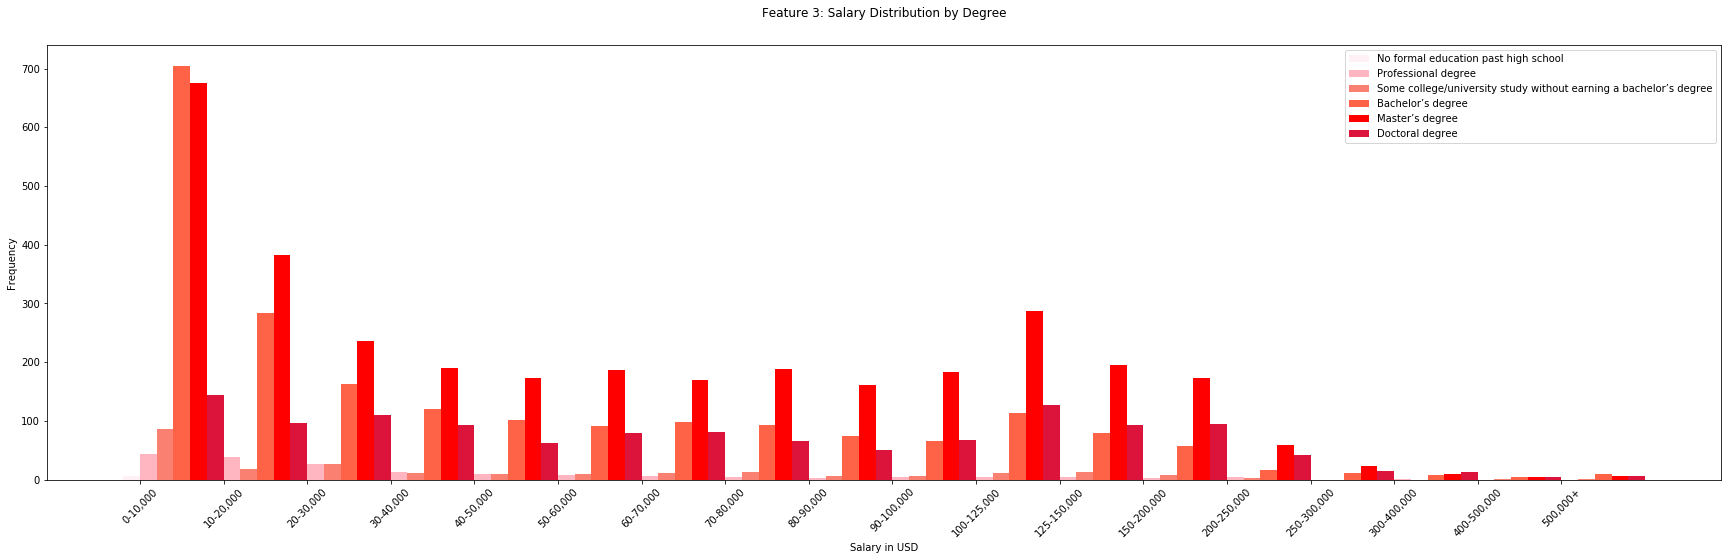

In [14]:
fig, ax = plt.subplots(figsize=(30,8))
ind = np.arange(len(Salaries_list))
width = 0.20

No_degree = d['No formal education past high school'].tolist()
Pro_degree = d['Professional degree'].tolist()
No_bachelor = d['Some college/university study without earning a bachelor’s degree'].tolist()
Bachelar = d['Bachelor’s degree'].tolist()
Master = d['Master’s degree'].tolist()
Doctor = d['Doctoral degree'].tolist()

p1 = ax.bar(ind,No_degree,width,color='lavenderblush')
p2 = ax.bar(ind+width,Pro_degree,width,color='lightpink')
p3 = ax.bar(ind+width*2,No_bachelor,width,color='salmon')
p4 = ax.bar(ind+width*3,Bachelar,width,color='tomato')
p5 = ax.bar(ind+width*4,Master,width,color='r')
p6 = ax.bar(ind+width*5,Doctor,width,color='crimson')

ax.set_title('Feature 3: Salary Distribution by Degree',y=1.05)
ax.set_ylabel('Frequency')
ax.set_xlabel('Salary in USD')
ax.set_xticks(ind + width / 2)    
ax.set_xticklabels(Salaries_list)

ax.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), d.columns)

plt.xticks(rotation=45)
plt.show()

- Figure 3 shows the salary distribution by degree. This figure indicates that the participants are composed of a large proportion of Bachelor's degree holders and Measter's degree holders whereas people with "No formal education past high school', 'Professional degree', and 'Some college/university study without earning a bachelor's degree" generally do not make it to the range beyond 50,000 a year. The second mode indicates that most participants that fall under this category are made up of master's degree holders. The amount of participants with a Doctor's degree at 100,000- 125,000 is approximately equal to the amount at 0-10,000. From this figure we can deduce ducation generally has a positive effect on yearly compensation but further feature selection is needed to sustantiate this statement.

### Feature Importance 

In [15]:
y = Salaries['Q9'].copy()
x = Salaries.drop(['Q9', 'index'], axis = 1)
e = pd.concat([x,y],axis = 1)
q9_corr = e.corr()['Q9']
q9_corr = q9_corr.sort_values(ascending=False)
print(q9_corr)

Q9                                                                   1.000000
United States of America                                             0.586168
Q2                                                                   0.494669
Q24                                                                  0.488057
Q8                                                                   0.307544
Q10                                                                  0.273374
Q15_Part_2                                                           0.260951
Q27_Part_1                                                           0.251795
Q38_Part_10                                                          0.242685
Q11_Part_1                                                           0.237923
Q30_Part_9                                                           0.235607
Q11_Part_4                                                           0.230801
Q42_Part_1                                                      

In [16]:
q9_corr = q9_corr.apply(np.absolute).sort_values(ascending=False)
print(q9_corr[1:11])

United States of America    0.586168
Q2                          0.494669
Q24                         0.488057
India                       0.415134
Student                     0.348481
Q8                          0.307544
I am a student              0.304221
Q10                         0.273374
Q15_Part_2                  0.260951
Q27_Part_1                  0.251795
Name: Q9, dtype: float64


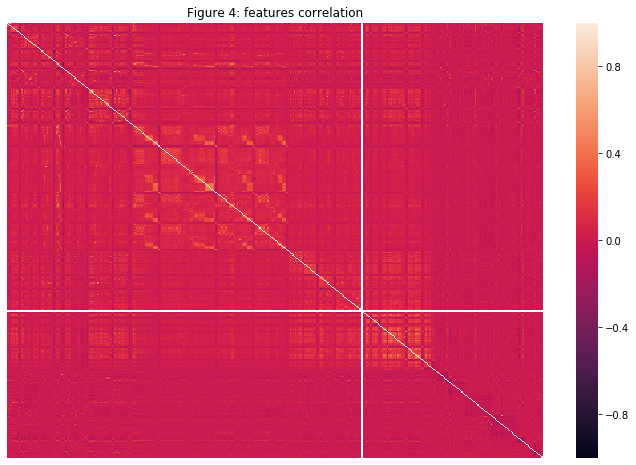

Correlation for Q1 Female and Male:  -1.0
Correlation for Q6 I am a student and Q7 Student:  0.6581161503575012


In [17]:
y = Salaries['Q9'].copy()
x = Salaries.drop(['Q9', 'index'], axis = 1)
corr = x.corr()
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr, yticklabels=False, xticklabels=False,
           ax = ax)
ax.set_title('Figure 4: features correlation')
plt.show()
print('Correlation for Q1 Female and Male: ',
      corr['Female']['Male']) #Q1
print('Correlation for Q6 I am a student and Q7 Student: ',
      corr['I am a student']['Student']) #Q6 and Q7

This heat map presents the correlation among the features. Light color indicates a positive correlation while dark color mean negative one. The shade of the color shows the strength of the correlation. It is expected the raw features at this stage has high internal correlation. As a results of one hot encoding, features such as Male is highly correlated to female. These redundant features will be removed during feature selection and dimension reduction.

## Step 3 - Feature Selection
### Chi-square
Chi-sqaure is a filter-based feature selection method. Filter method relies on the general uniqueness of the data to be evaluated and pick feature subset, not including any mining algorithm. Filter method uses the exact assessment criterion which includes distance, information, dependency, and consistency. The reason for using the ranking method is simplicity, produce excellent and relevant features. Because both features and the label are categorical data, chi-square is chosen for feature selection.

20 features have been selected using this method.

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

Y = Salaries['Q9'].copy()
X = Salaries.drop(['Q9', 'index'], axis = 1)

#feature extraction
test = SelectKBest(score_func=chi2, k=20)
fit = test.fit(X, Y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X)

# Summarize selected features
features.shape 

[2584.572   67.833 1958.899  613.419  210.292  122.505  173.91   230.324
   65.538  142.9     23.26    13.839  139.948   20.416   20.119   50.766
   27.803   75.404   20.531   26.267   21.193   55.067   33.302   20.712
   17.63    37.528   38.625   57.959   21.609  104.664   22.965   23.531
   30.251   25.083    9.002   26.45    52.257   48.066  270.203  111.247
   46.254  131.251  246.695   17.811    7.313  104.124  137.648  186.351
   78.117   21.068   69.598  264.757  130.561   91.772   89.229   68.718
   17.854   35.991   53.586   77.287   21.409   22.716   17.495   24.961
   33.565   27.502  177.557  170.734   37.86    73.679  180.716   94.179
   13.539   90.834   48.741   50.383   95.185   74.527   94.154   44.563
   21.479  133.432   12.804   47.988  273.667  202.875   70.507  144.08
   21.397   14.442   92.579   37.058   26.937   52.704   20.168  995.78
  344.704   63.883  115.584   45.133  166.417  188.496   40.816   58.096
   92.311   86.53    65.934   60.734   64.921   61.16

(7106, 20)

### Recursive Feature Elimination
Recursive feature selection is a filter-based feature selection method. Recursive feature elimination performs a greedy search to find the best performing feature subset. It iteratively creates models and determines the best or the worst performing feature at each iteration. It constructs the subsequent models with the left features until all the features are explored. It then ranks the features based on the order of their elimination. 

200 features have been selected using this method. Because filter methods do not incorporate a machine learning model in order to determine if a feature is good or bad whereas wrapper methods use a machine learning model and train it the feature to decide if it is essential or not, I decide to proceed feature modeling with this method.

In [19]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Feature extraction
model = LogisticRegression()
rfe = RFE(model)
x_selected = rfe.fit_transform(X, Y)
x_selected.shape

/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_mod

/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_mod

/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_mod

/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_mod

/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_mod

/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_mod

/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_mod

/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_mod

/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_mod

/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_mod

/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_mod

/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_mod

(7106, 201)

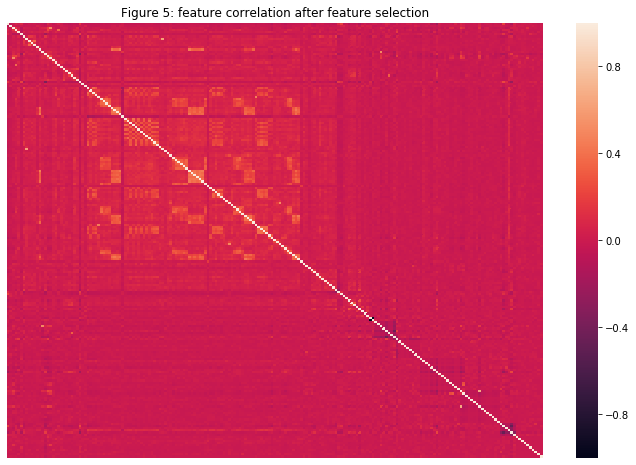

In [20]:

corr = pd.DataFrame(data=x_selected).corr()

# Y = Salaries['Q9'].copy()
# X = Salaries.drop(['Q9', 'index'], axis = 1)

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr, yticklabels=False, xticklabels=False,
           ax = ax)

ax.set_title('Figure 5: feature correlation after feature selection')
plt.show()


The figure 5 below shows the features' multicolinearity. In contrast to figure 4, most highly correlated features has been removed. 

## Step 4 - Model Implentation
### Split the data and the labels
A model is built for the Titanic data. First, lets split the training set into a training and validation set, with a 70%-30% split. 

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = pd.DataFrame(x_selected)
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.3)

### Rescaling values
Feature scaling is used to normalize the range of independent variables or features of data. Different features in the data might have varying magnitude. The range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.
 

In [22]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Create and fit a model

Now, we can train and fit a model to the training set we created above.

In [23]:
import warnings
#warnings.filterwarnings("ignore", categ'/ory=ConvergenceWarning)
#  warnings.filterwarnings("ignore")
model = LogisticRegression()    
model.fit(X_train, y_train)

/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Probability of belonging to each of the salary buckets 

In [24]:
#Probability of belonging to each of the salary buckets 
Probability = model.predict_proba(X)
Probability = pd.DataFrame(Probability)
Probability

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.409264,0.250351,0.102786,0.058172,0.035493,0.036950,0.021998,0.015418,0.006463,0.019661,0.025227,0.006827,0.007537,0.001494,0.000263,0.000684,0.000697,0.000717
1,0.108603,0.054901,0.120962,0.056254,0.068390,0.049978,0.045029,0.101821,0.025615,0.067321,0.124422,0.099835,0.067474,0.004537,0.000369,0.000861,0.001291,0.002337
2,0.107277,0.136500,0.135105,0.120623,0.109171,0.055484,0.050657,0.050878,0.022475,0.058211,0.077749,0.041133,0.025898,0.006981,0.000419,0.000302,0.000658,0.000479
3,0.103882,0.080788,0.076355,0.030102,0.054033,0.082757,0.021210,0.089312,0.026684,0.061381,0.222073,0.051954,0.093428,0.003803,0.000613,0.000374,0.000509,0.000742
4,0.057753,0.084507,0.087279,0.074245,0.069222,0.048149,0.057877,0.061413,0.035126,0.097823,0.161241,0.074367,0.071109,0.011212,0.002638,0.001912,0.002800,0.001328
5,0.116534,0.146304,0.114144,0.118686,0.105048,0.051076,0.025800,0.092382,0.014361,0.060710,0.084297,0.031743,0.030744,0.004699,0.000095,0.001317,0.001692,0.000368
6,0.420842,0.232978,0.101002,0.068410,0.036872,0.023426,0.026825,0.013077,0.006480,0.011501,0.036567,0.009902,0.006118,0.002713,0.000485,0.000509,0.001102,0.001191
7,0.119304,0.125340,0.091562,0.084922,0.065877,0.054534,0.059570,0.063767,0.048871,0.053016,0.131946,0.065003,0.029228,0.002696,0.000844,0.000554,0.001867,0.001102
8,0.159533,0.156846,0.150771,0.048494,0.128533,0.040803,0.028182,0.062190,0.015768,0.046472,0.100364,0.026202,0.022509,0.006854,0.001331,0.000522,0.003047,0.001578
9,0.162869,0.102986,0.076606,0.060181,0.054237,0.038768,0.045986,0.085264,0.034097,0.051735,0.170254,0.047134,0.051162,0.008145,0.001497,0.000725,0.007609,0.000745


In [25]:
#average probability
prob_list = []
for i in range(18):
    prob = Probability[i].sum()/len(Probability)
    prob_list.append(prob)
prob_table = pd.DataFrame(prob_list)
prob_table

,0
0,0.260593
1,0.160504
2,0.103931
3,0.067217
4,0.065394
5,0.039174
6,0.042647
7,0.046963
8,0.020469
9,0.044025


### Validate model: Get accuracy of model on testing set

In [26]:
from sklearn.metrics import make_scorer, confusion_matrix

predictions = model.predict(X_test)
    
TN = confusion_matrix(y_test, predictions)[0][0]
FP = confusion_matrix(y_test, predictions)[0][1]
FN = confusion_matrix(y_test, predictions)[1][0]
TP = confusion_matrix(y_test, predictions)[1][1]
total = TN + FP + FN + TP
ACC = (TP + TN) / float(total)

print ("This model got an accuracy of {}% on the testing set".format(round(ACC*100,2)))   

This model got an accuracy of 71.76% on the testing set


### Evaluation: Cross Validation
I use KFold Cross Validation to split the training data into k equal sizes. Then of the k subsamples, a single sample is used for testing, and the remaining k-1 samples are used for training. This process continues k times, and each time a different sample is used for testing. The optimization goal is to minimize residual sum of squares between the observed responses in the dataset, and the responses predicted by the logistic approximation. Across 10 folds most accuracy is between 0.65 and 0.75. The mean accuracy of this model is 0.68926 and standard deviation is 0.03682.

In [27]:

model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10, random_state=0)
kfold.get_n_splits(X)

accuracy = np.zeros(10)
np_idx = 0

for train_idx, test_idx in kfold.split(X):
    X_train_K, X_test_K = X.values[train_idx], X.values[test_idx]
    y_train_K, y_test_K = Y.values[train_idx], Y.values[test_idx]
    
    X_train_K = scaler.fit_transform(X_train_K)
    X_test_K = scaler.transform(X_test_K)
    
    model.fit(X_train_K, y_train_K)
    
    predictions = model.predict(X_test_K)
    
    TN = confusion_matrix(y_test_K, predictions)[0][0]
    FP = confusion_matrix(y_test_K, predictions)[0][1]
    FN = confusion_matrix(y_test_K, predictions)[1][0]
    TP = confusion_matrix(y_test_K, predictions)[1][1]
    total = TN + FP + FN + TP
    ACC = (TP + TN) / float(total)
    
    accuracy[np_idx] = ACC*100
    np_idx += 1
    
    print ("Fold {}: Accuracy: {}%".format(np_idx, round(ACC,3)))     

print ("Average Score: {}%({}%)".format(round(np.mean(accuracy),3),round(np.std(accuracy),3)))

/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Fold 1: Accuracy: 0.725%


/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Fold 2: Accuracy: 0.629%


/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Fold 3: Accuracy: 0.695%


/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Fold 4: Accuracy: 0.651%


/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Fold 5: Accuracy: 0.754%


/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Fold 6: Accuracy: 0.72%


/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Fold 7: Accuracy: 0.673%


/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Fold 8: Accuracy: 0.714%


/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Fold 9: Accuracy: 0.674%


/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Fold 10: Accuracy: 0.658%
Average Score: 68.926%(3.682%)


Plot the mean accuracy, the "learning curve", of the classifier on both the training and validation dataset.

/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_mod

/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_mod

/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_mod

<module 'matplotlib.pyplot' from '/Users/chuchu/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

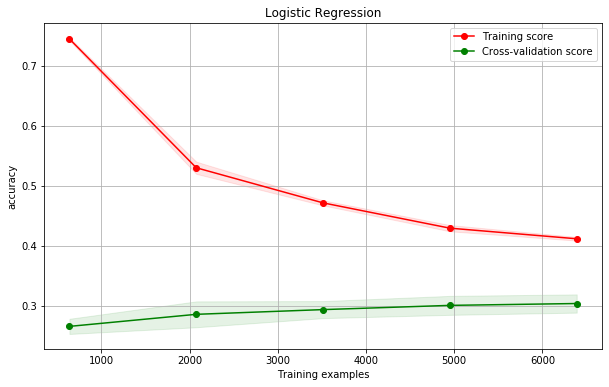

In [28]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1,\
                        train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    
    plt.figure(figsize=(10,6))
    plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,\
                     train_scores_mean + train_scores_std, alpha=0.1, \
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,\
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    
    return plt

plot_learning_curve(model,'Logistic Regression', X, Y, cv=10)

### Bias Variance Trade off

In [110]:
errors_test=[]
errors_train=[]
var_list = []
bias_list =[]
total_error_list = []
C_list = [0.001,0.01,0.05,0.1,0.5,1,5,10, 100]
for C in C_list:
    model = LogisticRegression(C = C,solver='liblinear')
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test) #^y0
    y_train_pred=model.predict(X_train)
    
    #variance + bias
#     total_error = mean_squared_error(y_test,y_pred)
#     total_error_list.append((total_error))
    
    mean_y_pre = []
    for i in range (2132):
        mean_y_pre.append(mean(y_pred))
    mean_y_pre_array = np.array(mean_y_pre)
    
    variance = mean_squared_error(y_pred,mean_y_pre_array)
    bias = mean_squared_error(mean_y_pre_array,y_test)
    var_list.append((variance))
    bias_list.append((bias))
    
    total_error = variance + bias
    total_error_list.append((total_error))
    

/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [162]:
total_error_list

[40.868227474488634,
 39.737244754284745,
 39.161063522346865,
 39.145095375040924,
 39.56137557244385,
 39.82904169116017,
 40.26423453565609,
 40.78978946738522,
 42.41636159794994]

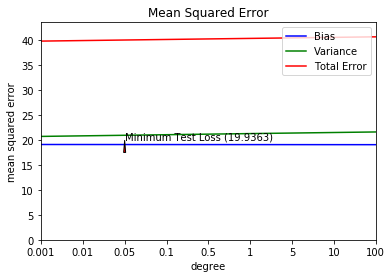

In [164]:
# plt.plot(C_list, bias_list_, 'o-', color="b",label="Bias^2")
# #To better visualize variance(SE of coefs), we add a scaler .01 
# plt.plot(C_list, var_list, 'o-', color="g", label="Variance")
# plt.plot(C_list, total_error_list, 'o-', color="r", label="total error")
# plt.semilogx()
# plt.legend(loc="best")
# plt.title("Variance Bias trade off")
# plt.axvline(x=0.1,linestyle="--", color='black')
# plt.show()

# plt.figure(figsize=(12,5))
fig, ax = plt.subplots()

ax.plot(C_list,bias_list,'b',label='Bias')
ax.plot(C_list, var_list,'g',label='Variance')
ax.plot(C_list, total_error_list,'r', label='Total Error')

test_loss_min = min(var_list)
deg_min = np.array(var_list).argmin() + 1

#Annotate the plot:plt.annotate(text,pointing coordinates,text coordinates,arrowproperty={})
ax.annotate('Minimum Test Loss (%.4f)' % test_loss_min,xy=(deg_min,test_loss_min),xytext=(deg_min,test_loss_min+0.08),arrowprops=dict(width=1,headwidth=2,facecolor='r',shrink=0.05))

plt.title("Mean Squared Error")
plt.xlabel("degree")
plt.ylabel("mean squared error")
plt.legend(loc=1)
plt.xlim(1,9)
ax.set_xticklabels(C_list)
ax.set_yticks([x*5 for x in range(9)])

This figure indicates that the lower degree models are underfitting the data with a high training error and low testing error. Initially with increasing model complexity, the traing error and the testing error decrease together until the model starts overfitting. Once the model starts overfitting, the training error continues to decrease while the testing error increases. Here after 10**-1, the error diverges due to numerical instability. 

## Step 5 - Model Tunning
### Optimize Model: Grid Search
The optimal log model uses C=0.05, and a sag solver, and has a cross validation score of 69.099% with a standard deviation of 3.43%

In [116]:
model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X)

best_model = model
best_params = {}
best_accuracy = 0
best_std = 0

for C in [0.001,0.01,0.05,0.1,0.5,1,5,10, 100]:
    for solver in ['newton-cg','lbfgs','liblinear','sag']:
        
        model = LogisticRegression(C=C, solver=solver)
        accuracy = np.zeros(10)
        np_idx = 0
        
        for train_idx, test_idx in kfold.split(X):
            X_train, X_test = X.values[train_idx], X.values[test_idx]
            y_train, y_test = y.values[train_idx], y.values[test_idx]

            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

            model.fit(X_train, y_train)

            predictions = model.predict(X_test)

            TN = confusion_matrix(y_test, predictions)[0][0]
            FP = confusion_matrix(y_test, predictions)[0][1]
            FN = confusion_matrix(y_test, predictions)[1][0]
            TP = confusion_matrix(y_test, predictions)[1][1]
            total = TN + FP + FN + TP
            ACC = (TP + TN) / float(total)

            accuracy[np_idx] = ACC*100
            np_idx += 1
        
        if np.mean(accuracy) > best_accuracy:
            best_model = model
            best_params = {'C':C, 'solver':solver}
            best_accuracy = np.mean(accuracy)
            best_std = np.std(accuracy)

print (best_params)
print ("Best Score: {}%({}%)".format(round(best_accuracy,3),round(best_std,3)))      

print ("\nThe optimal log model uses C={}, and a {} solver, and has a cross validation score of {}% with a standard deviation of {}%".format(best_params['C'],best_params['solver'],round(best_accuracy,3),round(best_std,3)))

/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklear

/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklear

/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklear

/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/chuchu/anaconda3/lib/python3.7/s

/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs f

/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logis

/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number 

/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number 

/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklear

/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number 

/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number 

/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklear

{'C': 0.05, 'solver': 'sag'}
Best Score: 69.099%(3.43%)

The optimal log model uses C=0.05, and a sag solver, and has a cross validation score of 69.099% with a standard deviation of 3.43%


### Performance Evaluation

In [173]:
#Split the data and the labels
X = pd.DataFrame(x_selected)
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.3)

#Feature scaling
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#fit a model
model = LogisticRegression(C=0.05)    
model.fit(X_train, y_train)

/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### Accuracy

In [185]:
predictions = model.predict(X_test)
TN = confusion_matrix(y_test, predictions)[0][0]
FP = confusion_matrix(y_test, predictions)[0][1]
FN = confusion_matrix(y_test, predictions)[1][0]
TP = confusion_matrix(y_test, predictions)[1][1]
total = TN + FP + FN + TP
ACC = (TP + TN) / float(total)

print ("This model got an accuracy of {}% on the testing set".format(round(ACC*100,2)))  

This model got an accuracy of 71.13% on the testing set


#### Recall, Precision, and F1-Score

In [186]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.53      0.82      0.65       524
           1       0.25      0.21      0.23       236
           2       0.22      0.09      0.12       161
           3       0.14      0.07      0.09       141
           4       0.15      0.09      0.11       110
           5       0.21      0.22      0.21       105
           6       0.21      0.14      0.17       113
           7       0.16      0.17      0.17        98
           8       0.11      0.06      0.08        97
           9       0.09      0.08      0.08        91
          10       0.16      0.29      0.21       161
          11       0.14      0.08      0.10       133
          12       0.21      0.30      0.25        88
          13       0.09      0.02      0.04        44
          14       0.00      0.00      0.00        15
          15       0.00      0.00      0.00         7
          16       0.00      0.00      0.00         4
          17       0.50    

/Users/chuchu/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#salary disctionary
scale_Q9 = {'10-20,000': 1, '0-10,000': 0, '20-30,000': 2, '125-150,000': 11, '30-40,000': 3, 
                '50-60,000': 5, '100-125,000': 10, '90-100,000': 9, '70-80,000': 7, '80-90,000': 8, 
                '60-70,000': 6, '400-500,000': 16, '40-50,000': 4, '150-200,000': 12, '500,000+': 17,
                '300-400,000': 15, '200-250,000': 13, '250-300,000': 14}
                
Support defines the number of relevant samples in the testing set. Our testing set has 524 salary bucket 1 (0-10,000) samples, 236 salary bucket 2 (10-20,000) samples, 161 salary bucket 3 (125-150,000) samples, so on and so forth, for a total of 2132 samples, which is 30% of our data (7106 total samples). 

Recall defines how many of the class samples the model found in the testing set and correctly identify for one class. For salary bucket 1 (0-10,000), of the 524 samples, we found and correctly identified 82% of them, so 430 samples, were found and corretly identified. Notice that only salary bucket 1 (0-10,000) has a relatively high recall score, the rest of the salary buckets has a recall score lower than 30%.

F1-score takes both support and recall into consideration. It is defined as:
$$F1-score = \frac{2}{\frac{1}{R1ecall} + \frac{1}{Precision}}$$

## Step 6 - Testing & Discussion
### Single sample prediction

In [187]:
idx = 90
X.iloc[idx]

0      0
1      0
2      1
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     1
14     0
15     1
16     1
17     0
18     0
19     0
20     0
21     1
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
171    0
172    0
173    0
174    0
175    0
176    0
177    1
178    0
179    0
180    0
181    0
182    0
183    0
184    0
185    0
186    1
187    0
188    0
189    0
190    0
191    1
192    0
193    0
194    0
195    0
196    0
197    0
198    0
199    0
200    0
Name: 90, Length: 201, dtype: int64

In [188]:
single_x_test = [X.iloc[idx].tolist()]
single_y_test = Y.iloc[idx]
single_prediction = model.predict(single_x_test)

print('For this sample, our model predicted %s and it was actually %s' % (single_prediction[0], single_y_test))

For this sample, our model predicted 0 and it was actually 0


#### Entire test set

In [189]:
predictions = model.predict(X_test)
resultsDF = pd.DataFrame({
        'true':y_test,
        'predicted':predictions
    })
resultsDF.head()

,true,predicted
12680,4,4
10913,1,0
8621,8,10
9033,12,5
10851,14,11


In [190]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

predictions_test = model.predict(X_test)
predictions_train = model.predict(X_train)

train_r2 = r2_score(y_train, predictions_train)
test_r2 = r2_score(y_test, predictions_test)

test_error = mean_absolute_error(y_test, predictions_test)
train_error = mean_absolute_error(y_train, predictions_train)
print('r2 score on train set is %f, and on test set is %f'%(train_r2, test_r2))
print('squared error score on train set is %f, and on test set is %f'%(train_error, test_error))

r2 score on train set is 0.547228, and on test set is 0.454261
squared error score on train set is 1.707680, and on test set is 2.060038


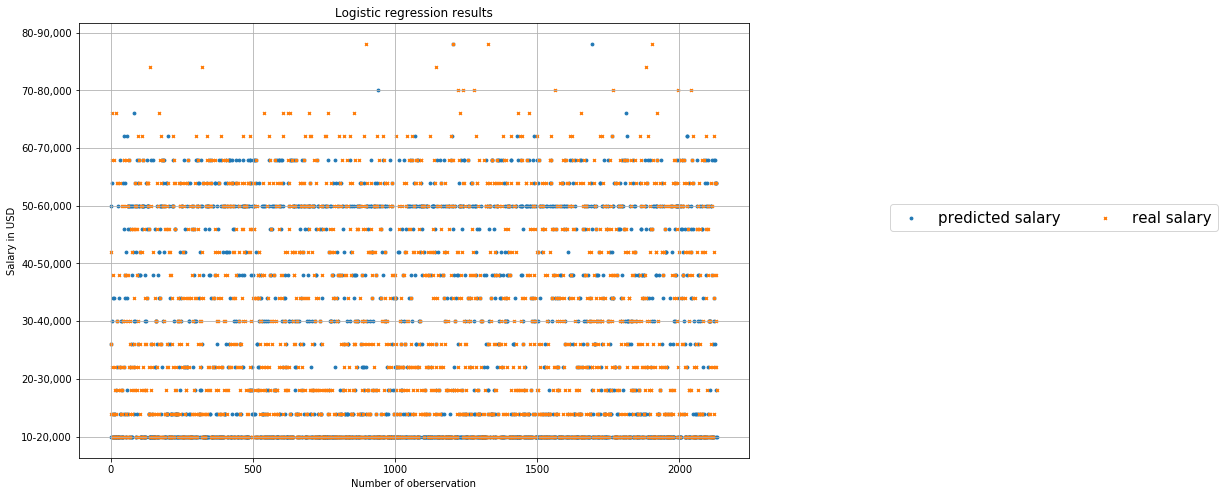

In [191]:
line = range(len(predictions_test))

fig, ax = plt.subplots(figsize=(12,8))
p1 = ax.scatter(line, predictions_test, s=8, marker='o')
p2 = ax.scatter(line, y_test, s=8, marker='x')

ax.set_title('Logistic regression results')
ax.grid(True)
ax.set_xlabel('Number of oberservation')
ax.set_ylabel('Salary in USD')
ax.set_yticklabels(Salaries_list)

3
plt.legend([p1, p2], ['predicted salary', 'real salary'],
          bbox_to_anchor=(1.2,0.6), fontsize=15, ncol=3, scatterpoints=1)

plt.show()

- The logistic regression model is trained with the parameters from the previous step. The result is visualized in the above figure, it is evident that the prediction made by the model is mostly below 60,000-70,000 USD. This model doesn't perform well in high salary range.
- The R2 score on train set is 0.547228 and 0.454261 on test set, and the squared error is slightly smaller on test set than train set (1.707680 on train set and 2.060038 on test set). The performance on the train set is better than the performance on the test set. The pattern of higher error on test set indicates a sign of overfitting, as the regression model fails to generalize the error in the train set.
- To correct the overfitting and improve the model, more value of alpha should be tested in grid search in order to further regularize the fitting process. Increase the maximum number of iteration can also give the model more room to converge and results in higher accuracy. Alternatively, we can decrease the complexity of the model to improve the overfitting with demensionality reduction method, for example, PCA. 